In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#read from csv 
df = pd.read_csv('Final cleaned dataset.csv')
print(df.head())
#Data cleaning 
print(df.shape)

   Unnamed: 0 gender  hypertension  heart_disease  ever_married  work_type  \
0           0      0             0              0             2          1   
1           1      0             1              0             1          4   
2           2      1             0              0             2          4   
3           3      1             0              0             1          4   
4           4      0             0              0             2          3   

   Residence_type  smoking_status  age_group  avg_glucose_group  BMI_grp  \
0               1               3          1                1.0      1.0   
1               2               2          2                1.0      4.0   
2               2               3          1                2.0      1.0   
3               1               1          3                1.0      4.0   
4               1               3          1                3.0      2.0   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0  
(4

In [5]:
#drop the null values from each column
df = df.dropna(subset=['hypertension'])
df = df.dropna(subset=['heart_disease'])
df = df.dropna(subset=['ever_married'])
df = df.dropna(subset=['work_type'])
df = df.dropna(subset=['Residence_type'])
df = df.dropna(subset=['smoking_status'])
df = df.dropna(subset=['age_group'])
df = df.dropna(subset=['avg_glucose_group'])
df = df.dropna(subset=['BMI_grp'])
df = df.dropna(subset=['stroke'])
print(df.shape)

(42959, 12)


In [6]:
#remove the frist column
df = df.drop(df.columns[0], axis=1)
#Data cleaning 
print(df.shape)

(42959, 11)


In [8]:
#print the correlation matrix
print(df.corr())
print("")

                   hypertension  heart_disease  ever_married  work_type  \
hypertension           1.000000       0.118513     -0.176905   0.124865   
heart_disease          0.118513       1.000000     -0.129470   0.102666   
ever_married          -0.176905      -0.129470      1.000000  -0.434880   
work_type              0.124865       0.102666     -0.434880   1.000000   
Residence_type        -0.003217      -0.002707     -0.004527  -0.001252   
smoking_status        -0.067126      -0.036020      0.150394  -0.161089   
age_group              0.261885       0.243701     -0.653980   0.444656   
avg_glucose_group      0.122274       0.114641     -0.118054   0.080056   
BMI_grp                0.150348       0.072848     -0.389147   0.403438   
stroke                 0.075478       0.113899     -0.072102   0.064061   

                   Residence_type  smoking_status  age_group  \
hypertension            -0.003217       -0.067126   0.261885   
heart_disease           -0.002707       -0.036

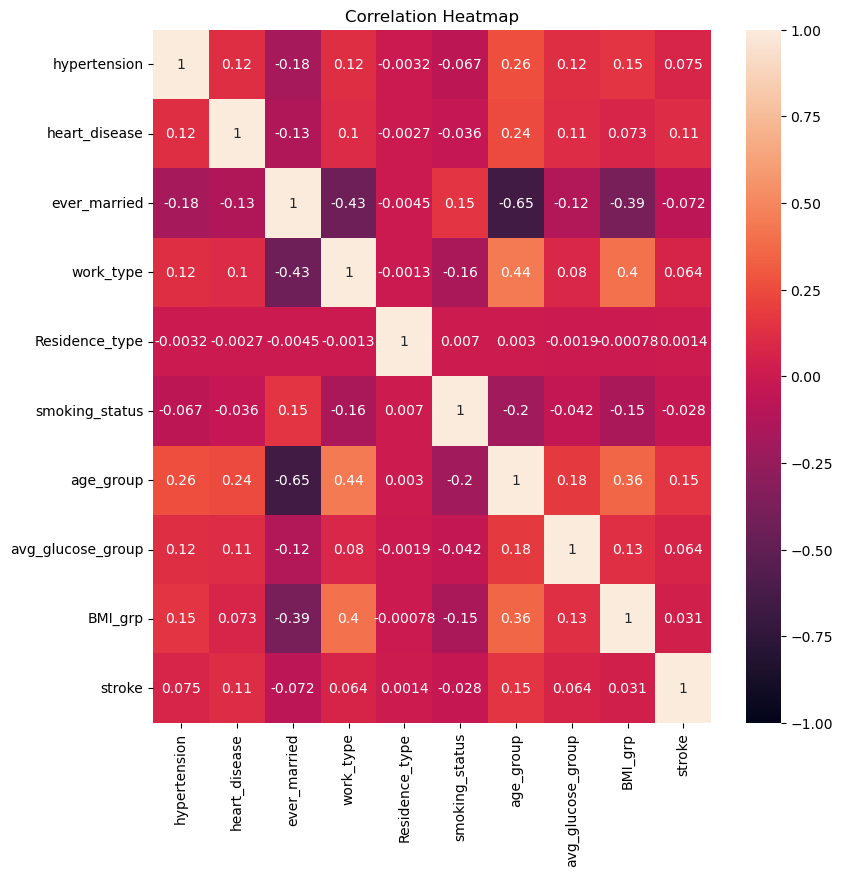

In [24]:
#create a heatmap of the correlation between the variables
fig, ax = plt.subplots(figsize=(9,9))
heatmap = sns.heatmap(df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','age_group','avg_glucose_group','BMI_grp','stroke']].corr(), vmin=-1, vmax=1, annot=True)
# Create the title
heatmap.set_title('Correlation Heatmap');

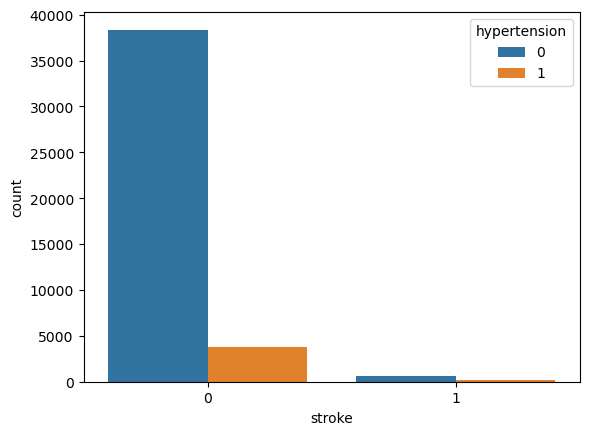

In [13]:
#create a multivariable bar chart
sns.countplot(x='stroke', hue='hypertension', data=df)
plt.show()

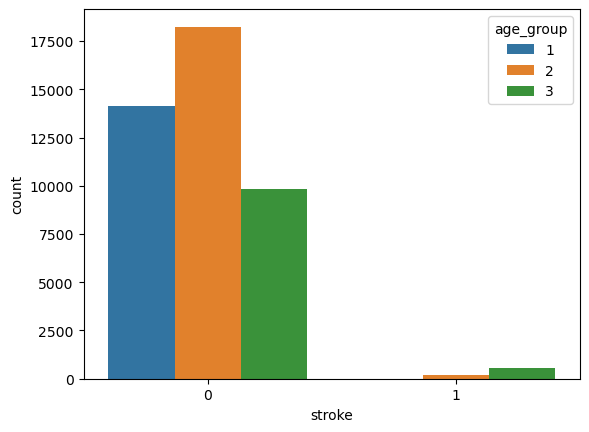

In [128]:
#create a multivariable bar chart
sns.countplot(x='stroke', hue='age_group', data=df)
plt.show()

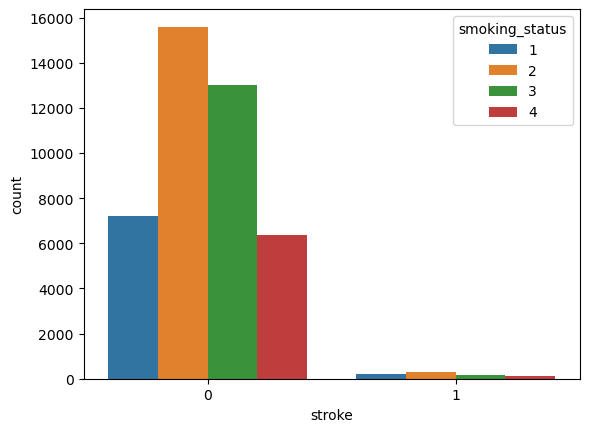

In [129]:
#create a multivariable bar chart
sns.countplot(x='stroke', hue='smoking_status', data=df)
plt.show()

In [82]:
#statistical analysis
from scipy.stats import ttest_ind
#test the null hypothesis that the data is from a normal distribution
print("")
print("T-test")
t_test = ttest_ind(df['hypertension'], df['stroke'])
print(t_test)


T-test
Ttest_indResult(statistic=48.84283296427645, pvalue=0.0)


In [ ]:
#Null hypothesis- There is a statistically significant difference between hypertension and stroke.
#Since, p- value is <0.05, we reject the null hypothesis. Therefore, hypertension and stroke are correlated.

In [83]:
print("T-test")
t_test = ttest_ind(df['age_group'], df['stroke'])
print(t_test)

T-test
Ttest_indResult(statistic=515.355090473048, pvalue=0.0)


In [ ]:
#Null hypothesis- There is a statistically significant difference between age_group and stroke.
#Since, p- value is <0.05, we reject the null hypothesis. Therefore, age_group and stroke are correlated.

In [25]:
print("T-test")
t_test = ttest_ind(df['heart_disease'], df['stroke'])
print(t_test)

T-test
Ttest_indResult(statistic=24.277283246200295, pvalue=9.350389807225646e-130)


In [ ]:
#Null hypothesis- There is a statistically significant difference between heart_disease and stroke.
#Since, p- value is <0.05, we reject the null hypothesis. Therefore, heart_disease and stroke are correlated.

In [27]:
print("T-test")
t_test = ttest_ind(df['smoking_status'], df['stroke'])
print(t_test)

T-test
Ttest_indResult(statistic=524.8775542181584, pvalue=0.0)


In [ ]:
#Null hypothesis- There is a statistically significant difference between smoking_status and stroke.
#Since, p- value is <0.05, we reject the null hypothesis. Therefore, smoking_status and stroke are correlated.

In [33]:
#chi square test
from scipy.stats import chi2_contingency
#create a contingency table

contingency_table = pd.crosstab(df['hypertension'], df['stroke'])
c, p, dof, expected = chi2_contingency(contingency_table)
print('chi square statistic: ', c)
print('pvalue: ' ,p)
print('degree of freedom: ', dof)
print('expected values: ', expected)



chi square statistic:  242.79581272033437
pvalue:  9.662910335291692e-55
degree of freedom:  1
expected values:  [[38229.95134896   706.04865104]
 [ 3950.04865104    72.95134896]]


Since the p-value  of the test is less than 0.05, we reject the null hypothesis. This means we have sufficient evidence to say that there is an association between hypertension and stroke.

In [34]:
#chi square test
from scipy.stats import chi2_contingency
#create a contingency table

contingency_table = pd.crosstab(df['age_group'], df['stroke'])
c, p, dof, expected = chi2_contingency(contingency_table)
print('chi square statistic: ', c)
print('pvalue: ' ,p)
print('degree of freedom: ', dof)
print('expected values: ', expected)

chi square statistic:  1124.7212763325024
pvalue:  5.8867826986153654e-245
degree of freedom:  2
expected values:  [[13862.97213622   256.02786378]
 [18109.54444936   334.45555064]
 [10207.48341442   188.51658558]]


Since the p-value  of the test is less than 0.05, we reject the null hypothesis. This means we have sufficient evidence to say that there is an association between age_group and stroke.

In [35]:
#chi square test
from scipy.stats import chi2_contingency
#create a contingency table

contingency_table = pd.crosstab(df['heart_disease'], df['stroke'])
c, p, dof, expected = chi2_contingency(contingency_table)
print('chi square statistic: ', c)
print('pvalue: ' ,p)
print('degree of freedom: ', dof)
print('expected values: ', expected)

chi square statistic:  553.3022063875746
pvalue:  2.4078527944154162e-122
degree of freedom:  1
expected values:  [[4.01740469e+04 7.41953118e+02]
 [2.00595312e+03 3.70468819e+01]]


Since the p-value  of the test is less than 0.05, we reject the null hypothesis. This means we have sufficient evidence to say that there is an association between heart_disease and stroke.

In [36]:
#chi square test
from scipy.stats import chi2_contingency
#create a contingency table

contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])
c, p, dof, expected = chi2_contingency(contingency_table)
print('chi square statistic: ', c)
print('pvalue: ' ,p)
print('degree of freedom: ', dof)
print('expected values: ', expected)

chi square statistic:  96.38436219439203
pvalue:  9.306422705506722e-21
degree of freedom:  3
expected values:  [[ 7289.37638213   134.62361787]
 [15591.0570544    287.9429456 ]
 [12928.23529412   238.76470588]
 [ 6371.33126935   117.66873065]]


Since the p-value  of the test is less than 0.05, we reject the null hypothesis. This means we have sufficient evidence to say that there is an association between smoking_status and stroke.

In [40]:
#Annova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('stroke ~ C(hypertension) + C(heart_disease)+ C(ever_married)+ C(work_type)+ C(Residence_type)+ C(smoking_status)+ C(Residence_type)+ C(smoking_status)+ C(smoking_status)+ C(age_group)+C(avg_glucose_group)+C(BMI_grp)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(hypertension),0.670526,1.0,39.008456,4.259178e-10
C(heart_disease),3.499593,1.0,203.592024,4.380320e-46
C(ever_married),0.035686,1.0,2.076057,1.496336e-01
C(work_type),0.107105,4.0,1.557730,1.825753e-01
C(Residence_type),0.001704,1.0,0.099118,7.528918e-01
C(smoking_status),0.022689,3.0,0.439984,7.244018e-01
C(age_group),8.172831,2.0,237.730990,2.099715e-103
C(avg_glucose_group),0.950524,2.0,27.648813,9.999961e-13
C(BMI_grp),0.734680,3.0,14.246887,2.822135e-09
Residual,738.106040,42940.0,NaN,NaN


In [43]:
#Machine Learning Models
#Splitting the dataset into the Training set and Test set
x = df[['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group', 'avg_glucose_group', 'BMI_grp']]
y = df['stroke']

In [44]:
x = x.apply(pd.to_numeric, errors='coerce')

In [45]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [47]:
#Binary logistic regression
from sklearn.linear_model import LogisticRegression

In [48]:
#fit the model
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
lg_pred = logisticRegr.predict(x_test)

In [49]:
#print model performance
print("Logistic regression Model")
print('Mean squared error: %.2f' % mean_squared_error(y_test, lg_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, lg_pred))

Logistic regression Model
Mean squared error: 0.02
Coefficient of determination: -0.02


In [50]:
from sklearn.metrics import accuracy_score
RF_accuracy = accuracy_score(y_test, lg_pred) * 100
print('Accuracy: ', RF_accuracy)

Accuracy:  98.14556176288019


In [53]:
#create a bar plot of the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, lg_pred))
print("")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12649
           1       0.00      0.00      0.00       239

    accuracy                           0.98     12888
   macro avg       0.49      0.50      0.50     12888
weighted avg       0.96      0.98      0.97     12888




C:\Users\palla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\palla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\palla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


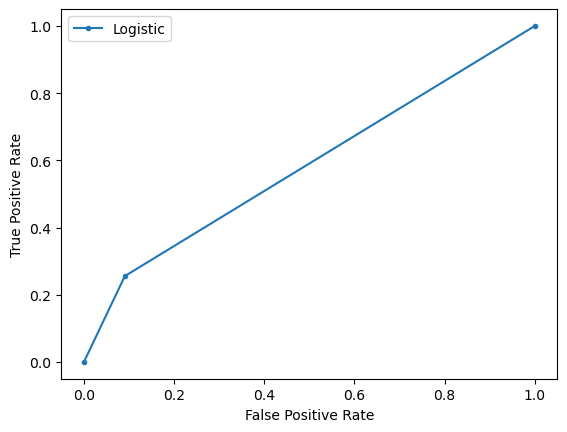

In [52]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, thresholds = roc_curve(df['stroke'], df['hypertension'])
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [54]:
#2nd model KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [55]:
#fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [56]:
#print model performance
print("KNN Model")
print('Mean squared error: %.2f' % mean_squared_error(y_test, knn_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, knn_pred))

KNN Model
Mean squared error: 0.02
Coefficient of determination: -0.03


In [57]:
from sklearn.metrics import accuracy_score
RF_accuracy = accuracy_score(y_test, knn_pred) * 100
print('Accuracy: ', RF_accuracy)

Accuracy:  98.1300434512725


In [59]:
#3d model Lasso Regression
from sklearn.linear_model import Lasso

In [60]:
#fit the model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)

In [61]:
#print model performance
print("Lasso Model")
print('Mean squared error: %.2f' % mean_squared_error(y_test, lasso_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, lasso_pred))

Lasso Model
Mean squared error: 0.02
Coefficient of determination: -0.00


In [62]:
#SMOTE to balance the data
from imblearn.over_sampling import SMOTE
from collections import Counter

In [63]:
print("Before SMOTE :" , Counter(y_train))
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
print("After SMOTE :" , Counter(y_train_res))

Before SMOTE : Counter({0: 29531, 1: 540})
After SMOTE : Counter({0: 29531, 1: 29531})


In [64]:
#create a new dataframe with the balanced data
new_df = pd.DataFrame(x_train_res, columns = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group', 'avg_glucose_group', 'BMI_grp'])
#add the y values to the dataframe
new_df['stroke'] = y_train_res

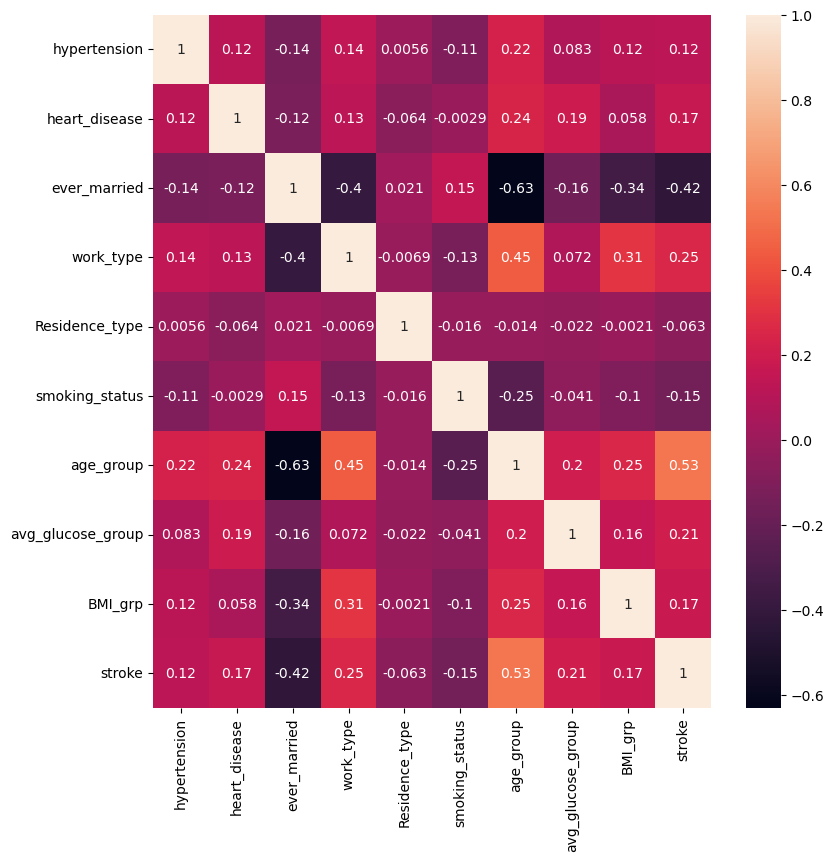

In [66]:
#create a heatmap of the smoothed data
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(new_df.corr(), annot=True)
plt.show()

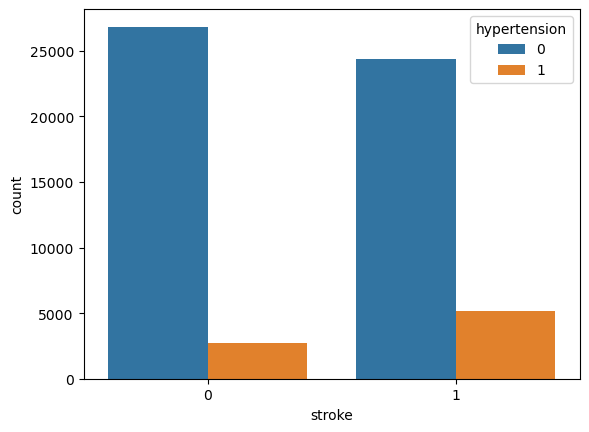

In [118]:
#create a multivariable bar chart
sns.countplot(x='stroke', hue='hypertension', data=new_df)
plt.show()

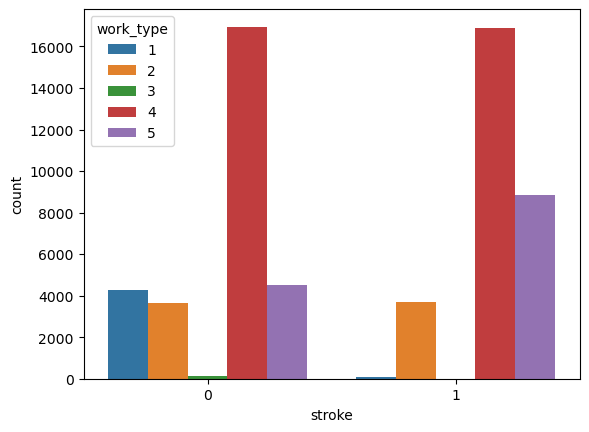

In [120]:
#create a multivariable bar chart
sns.countplot(x='stroke', hue='work_type', data=new_df)
plt.show()

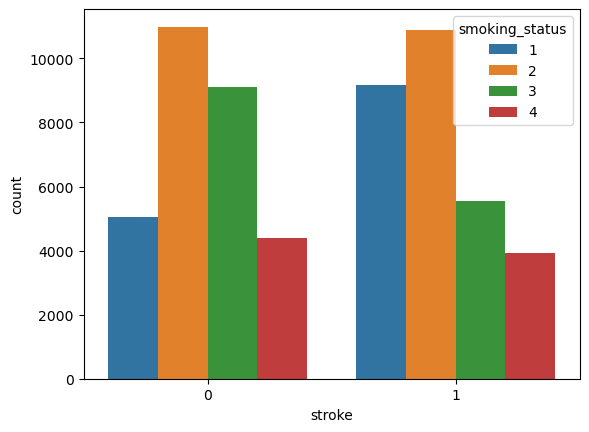

In [122]:
#create a multivariable bar chart
sns.countplot(x='stroke', hue='smoking_status', data=new_df)
plt.show()

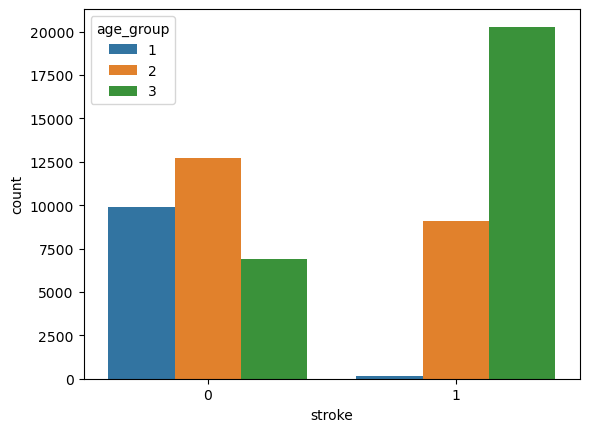

In [125]:
#create a multivariable bar chart
sns.countplot(x='stroke', hue='age_group', data=new_df)
plt.show()

In [67]:
#fit logistic regression after smote
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_res, y_train_res)
lg_pred = logisticRegr.predict(x_test)

In [68]:
#print model performance
print("Logistic regression Model after smote")
print('Mean squared error: %.2f' % mean_squared_error(y_test, lg_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, lg_pred))

Logistic regression Model after smote
Mean squared error: 0.27
Coefficient of determination: -13.75


In [69]:
from sklearn.metrics import accuracy_score
RF_accuracy = accuracy_score(y_test, lg_pred) * 100
print('Accuracy: ', RF_accuracy)

Accuracy:  73.1610800744879


In [70]:
#create a bar plot of the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, lg_pred))
print("")

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     12649
           1       0.05      0.73      0.09       239

    accuracy                           0.73     12888
   macro avg       0.52      0.73      0.47     12888
weighted avg       0.98      0.73      0.83     12888




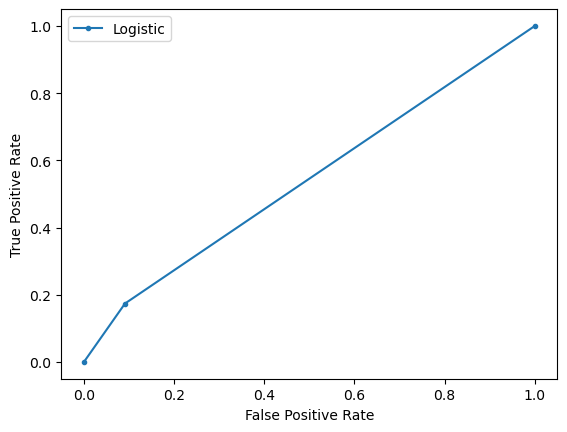

In [71]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, thresholds = roc_curve(new_df['stroke'], new_df['hypertension'])
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [72]:
#fit KNN model after smote
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_res, y_train_res)
knn_pred = knn.predict(x_test)

In [73]:
#print model performance
print("KNN Model")
print('Mean squared error: %.2f' % mean_squared_error(y_test, knn_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, knn_pred))

KNN Model
Mean squared error: 0.03
Coefficient of determination: -0.54


In [74]:
from sklearn.metrics import accuracy_score
RF_accuracy = accuracy_score(y_test, knn_pred) * 100
print('Accuracy: ', RF_accuracy)

Accuracy:  97.19894475481068


In [75]:
#create a bar plot of the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))
print("")

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12649
           1       0.04      0.02      0.03       239

    accuracy                           0.97     12888
   macro avg       0.51      0.51      0.51     12888
weighted avg       0.96      0.97      0.97     12888




In [76]:
#Lasso Regression after smote
from sklearn.linear_model import Lasso

In [79]:
#fit the model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_res, y_train_res)
lasso_pred = lasso.predict(x_test)

In [80]:
#print model performance
print("Lasso Model")
print('Mean squared error: %.2f' % mean_squared_error(y_test, lasso_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, lasso_pred))

Lasso Model
Mean squared error: 0.20
Coefficient of determination: -10.12


### NULL Hypothesis testing

In [114]:
print("T-test")
t_test = ttest_ind(new_df['age_group'], new_df['stroke'])
print(t_test)

T-test
Ttest_indResult(statistic=487.85654669480664, pvalue=0.0)


In [ ]:
#Null hypothesis- There is a statistically significant difference between age_group and stroke.
#Since, p- value is <0.05, we reject the null hypothesis. Therefore, age_group and stroke are correlated.

In [117]:
#chi-square test for hypothesis testing
contingency_table = pd.crosstab(new_df['age_group'], new_df['stroke'])
c, p, dof, expected = chi2_contingency(contingency_table)
print('chi square statistic: ', c)
print('pvalue: ' ,p)
print('degree of freedom: ', dof)
print('expected values: ', expected)

chi square statistic:  16706.514114880712
pvalue:  0.0
degree of freedom:  2
expected values:  [[ 5012.  5012.]
 [10928. 10928.]
 [13591. 13591.]]


In [ ]:
#Since the p-value  of the test is less than 0.05, we reject the null hypothesis. 
#This means we have sufficient evidence to say that there is an association between age_group and stroke.